In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('Data/train_features.csv')
#df.head().T

In [4]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
df['id'].nunique()

59400

In [70]:
def smart_impute(X):
    ''' Adapted directly from Dakota P.'s awesome work '''
    X = X.copy()
    
    # Convert all strings in object columns to lowercase
    cat_features = X.select_dtypes('object').columns.tolist()
    for feature in cat_features:
        X[feature] = X[feature].str.lower()
    
    # Replace -2.000000e-08 with np.nan (not showing as zero due to datatype)
    X['latitude'] = X['latitude'].replace( -2.000000e-08, np.nan)
    
    impute_features = ['gps_height', 'population', 'amount_tsh', 'construction_year', 'latitude', 'longitude']

    for feature in impute_features:
        # Replace values=0.0 with np.nan (0.0 appears to indicate missing values in dataset)
        X[feature] = X[feature].replace(0.0, np.nan)

        # If District code available replace NA's with mean value of other well in the same district 
        X[feature] = X[feature].fillna( X.groupby(['region', 'district_code'])[feature].transform('mean') )
        # If no district code, replace NA's  with mean value of other wells in the same region
        X[feature] = X[feature].fillna( X.groupby(['region'])[feature].transform('mean') )
        # If no district and no region, replace NA's with mean value of all wells
        X[feature] = X[feature].fillna( X[feature].mean() )
    
    return X

In [87]:
import category_encoders as ce

def ordinal(X):
    ord_cols = ['basin', 'region', 'scheme_management', 'extraction_type_class', 
                    'management_group', 'payment', 'quality_group', 
                    'quantity', 'source_type', 'source_class', 
                    'waterpoint_type', 'district_code']
    
    # Initialize and transform relevant features
    encoder = ce.OrdinalEncoder(cols=ord_cols)
    
    # Note, train hardcoded to avoid overfitting test data
    encoder.fit(X)
    X = encoder.transform(X)
    
    return X

In [88]:
ordinal(df)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,...,annually,soft,1,1,enough,spring,1,1,1,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,...,never pay,soft,1,2,insufficient,rainwater harvesting,2,2,1,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,...,per bucket,soft,1,1,enough,dam,3,2,2,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,...,never pay,soft,1,3,dry,machine dbh,4,1,2,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,...,never pay,soft,1,4,seasonal,rainwater harvesting,2,2,1,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,per bucket,salty,2,1,enough,other,5,3,2,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,...,never pay,soft,1,1,enough,machine dbh,4,1,3,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,...,unknown,milky,3,1,enough,shallow well,6,1,3,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,...,never pay,salty,2,4,seasonal,machine dbh,4,1,3,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,...,never pay,soft,1,1,enough,shallow well,6,1,3,hand pump


In [71]:
df = smart_impute(df)

In [72]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.000000,2011-03-14,roman,1390.000000,roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,374.652174,2013-03-06,grumeti,1399.000000,grumeti,34.698766,-2.147466,zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.000000,2013-02-25,lottery club,686.000000,world vision,37.460664,-3.821329,kwa mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,100.454545,2013-01-28,unicef,263.000000,unicef,38.486161,-11.155298,zahanati ya nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,1392.735151,2011-07-13,action in a,1057.545585,artisan,31.130847,-1.825359,shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
target = pd.read_csv('Data/train_labels.csv')
target['encoded'] = target['status_group'].replace({
    'functional':1,
    'non functional':-1,
    'functional needs repair':0
})


def non_func_features(X):
    X = X.copy()
    
    X['quantity_dry*pump_age/amount'] = X['quantity_dry'] / X['Pump_Age*Pop/Amount_tsg']
    
    X['Condition_Risk'] = X['quantity_dry'] + X['waterpoint_type_other'] + X['extraction_type_class_other'] + X['quality_group_unknown']
    X['Condition**2'] = X['Condition_Risk'] ** 2
    
    X['Tech_Risk'] = X['extraction_type_class_motorpump'] + X['source_type_shallow_well'] + X['source_type_borehold'] + X['waterpoint_type_communal standpipe multiple'] + X['waterpoint_type_other'] + X['extraction_type_other']
    X['Tech_Risk**2'] = X['Tech_Risk'] ** 2
    
    X['Non_Tech_Risk*Pump_age'] = X['Tech_Risk'] * X['pump_age']
    
    X['Location_Risk'] = X['basin_Ruvuma / Southern Coast'] + X['region_Lindi'] + X['region_Mtwara'] + X['region_Tabora'] + X['district_code_33.0'] + X['district_code_53.0'] + X['region_Rukwa']
    X['Location_Risk**2'] = X['Location_Risk'] ** 2
    
    X['Management_Risk'] = X['Tanzania_Gov_Funder'] + X['scheme_management_VWC'] + X['Gov_Installer'] + X['payment_never pay'] + X['payment_unkown']
    X['Management_Risk**2'] = X['Management_Risk'] ** 2
    
    X['Non_Func_Risk'] = X['Condition_Risk'] + X['Tech_Risk'] + X['Location_Risk'] + X['Management_Risk']
    X['Non_Func_Risk*Pump_age'] = X['Non_Func_Risk'] * X['pump_age']
    X['Non_Func_Risk**2'] = X['Non_Func_Risk'] ** 2
    
    return X 

def repair_features(X):
    X = X.copy()
    
    X['Tech_Repair_Score'] = X['source_class_surface'] + X['extraction_type_class_gravity'] + X['source_type_river/lake'] + X['source_type_rainwater harvesting']
    X['Tech_Repair_Score**2'] = X['Tech_Repair_Score'] ** 2
    
    X['Loc_Repair_Score'] = X['region_Kigoma'] + X['scheme_management_WUG'] + X['district_code_1.0'] + X['region_Shinyanga'] + X['basin_Lake Tanganyika']
    X['Loc_Repair_Score**2'] = X['Loc_Repair_Score'] ** 2
    
    X['Management_Repair_Score'] = X['scheme_management_Water authority'] + X['DWE_Installer'] + X['date_recorded_month_1.0']
    X['Management_Repair_Score**2'] = X['Management_Repair_Score'] ** 2
    
    X['Repair_Score'] = X['Tech_Repair_Score'] + X['Loc_Repair_Score'] + X['Management_Repair_Score']
    X['Repair_Score**2'] = X['Repair_Score'] ** 2

    return X
    

In [4]:
def install(X): 
    X = X.copy()
    
    X['DWE_Installer'] = (X['installer'] == 'DWE')

    one_time_install = df['installer'].value_counts()[df['installer'].value_counts() == 1]
    X['One_Time_Installer'] = X['installer'].isin(one_time_install.index)

    small_install = df['installer'].value_counts()[ (df['installer'].value_counts() < 10) & (df['installer'].value_counts() > 1) ]
    X['Small_Installer'] = X['installer'].isin(small_install.index)

    big_install = (( df['installer'].value_counts() >= 10 ) == True)
    X['Big_Installer'] = X['installer'].isin(big_install.index)
    
    X['pump_age'] = ( 2014 - X['construction_year'] )
    X['pump_age'] = X['pump_age'].replace({2014:-1})
    
    return X

In [5]:
X['dry&high'] = (X['Hot_Dry_Season'] + X['Cool_Dry_Season']) * X['latitude*height']
X['Pump_Age*Pop/Amount_tsg'] = X['Pump_Age'] * X['pop/amount_tsh']
X['pump_age_binned**2'] = X['pump_age_binned'] ** 2


In [9]:
temp = pd.concat([df, target], axis=1)

In [16]:
temp['ward'].describe()

count     59400
unique     2092
top       Igosi
freq        307
Name: ward, dtype: object

In [20]:
temp['district_code'].nunique()

20

In [59]:
pd.crosstab( [(temp['installer'] == 'Government'), temp['status_group']], temp['pump_age'], margins=True)

pump_age                              -1    1     2     3     4     5     6  \
installer status_group                                                        
False     functional               10369   80   690   920  1985  1756  1812   
          functional needs repair   1666    1    51    74    81   128   125   
          non functional            7841   59   287   228   523   614   636   
True      functional                 186   22    36    23    38    18    27   
          functional needs repair    123    0     0     4     9    10     2   
          non functional             524   14    20     7     9     7    11   
All                                20709  176  1084  1256  2645  2533  2613   

pump_age                              7     8     9  ...    46  47  48  49  \
installer status_group                               ...                     
False     functional               1062   874   567  ...    22  26   6  11   
          functional needs repair   103   130    85  ...     4   3   0   1   
          non functional            386   432   334  ...    41  12  11   4   
True      functional                 19     9    11  ...     0   5   0   0   
          functional needs repair    13     5     4  ...     0  14   0   0   
          non functional              4    21    10  ...    10  28   0   3   
All                                1587  1471  1011  ...    77  88  17  19   

pump_age                           50  51  52  53   54    All  
installer status_group                                         
False     functional                7  31   7   2   20  31724  
          functional needs repair   1   6   1   3    6   4061  
          non functional           16  48  21  13   68  21790  
True      functional                0   0   0   0    4    535  
          functional needs repair   0   0   0   0    0    256  
          non functional           16   0   1   3    4   1034  
All                                40  85  30  21  102  59400  

[7 rows x 56 columns]

In [98]:
rel_score = pd.crosstab(temp['scheme_management'], target['status_group'], margins=True)
rel_score = pd.DataFrame(rel_score)
rel_score

status_group,functional,functional needs repair,non functional,All
scheme_management,,,,
Company,534,37,490,1061
None,1,0,0,1
Other,458,22,286,766
Parastatal,966,202,512,1680
Private operator,729,23,311,1063
SWC,20,1,76,97
Trust,46,5,21,72
VWC,18960,2334,15499,36793
WUA,1995,239,649,2883


In [124]:
rel_score = pd.crosstab(temp['pump_age_binned'], target['status_group'])
rel_score = pd.DataFrame(rel_score)
new_feature = 'pump_age_binned' + '_rel_score'
total = rel_score['functional'] + rel_score['functional needs repair'] + rel_score['non functional']
rel_score[new_feature] = rel_score['functional'] / total
rel_score

status_group,functional,functional needs repair,non functional,pump_age_binned_rel_score
pump_age_binned,,,,
1,14349,2009,9512,0.554658
2,6859,675,2804,0.663475
3,3824,349,1798,0.640429
4,2477,354,1950,0.518092
5,1378,173,1204,0.500181
6,1467,296,1929,0.397346
7,872,190,1418,0.351613
8,778,214,1572,0.303432
9,173,39,440,0.265337


In [13]:
def create_score(X, feature):
    rel_score = pd.crosstab(X[feature], target['status_group'], margins=True)
    rel_score = pd.DataFrame(rel_score)
    
    new_feature = feature + '_rel_score'
    total = rel_score['functional'] + rel_score['functional needs repair'] + rel_score['non functional']
    rel_score[new_feature] = rel_score['functional'] / total
    
    rel_score = rel_score.reset_index()
    rel_score = rel_score[ [feature, new_feature] ]
    
    X = pd.merge(X, rel_score, how='left', on=feature)
    X[new_feature] = X[new_feature].fillna(0)
    
    return X

In [15]:
create_score(temp, 'region')
create_score(temp, 'basin')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,waterpoint_type_group,DWE_Installer,One_Time_Installer,Small_Installer,Big_Installer,pump_age,id,status_group,encoded,basin_rel_score
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,...,communal standpipe,False,False,False,True,15,69572,functional,1,0.653687
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,...,communal standpipe,False,False,False,True,4,8776,functional,1,0.497658
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,...,communal standpipe,False,False,False,True,5,34310,functional,1,0.600895
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,...,communal standpipe,False,False,False,True,28,67743,non functional,-1,0.371689
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,...,communal standpipe,False,False,False,True,-1,19728,functional,1,0.497658
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,communal standpipe,True,False,False,True,5,9944,functional,1,0.600895
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,...,hand pump,False,False,False,True,-1,19816,non functional,-1,0.575723
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,...,hand pump,True,False,False,True,-1,54551,non functional,-1,0.483053
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,...,hand pump,False,False,False,True,-1,53934,non functional,-1,0.483053
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,...,hand pump,False,False,False,True,-1,46144,functional,1,0.497658


In [11]:
corrs = temp.corr()
corrs['encoded']

id                   -0.004049
amount_tsh            0.053702
gps_height            0.114029
longitude            -0.004366
latitude              0.014547
num_private           0.005021
region_code          -0.108640
district_code        -0.065687
population            0.017759
construction_year     0.043342
DWE_Installer         0.012536
One_Time_Installer    0.007974
Small_Installer       0.000557
Big_Installer        -0.015080
pump_age             -0.149034
id                   -0.004049
encoded               1.000000
Name: encoded, dtype: float64

In [101]:
temp.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,waterpoint_type,waterpoint_type_group,DWE_Installer,One_Time_Installer,Small_Installer,Big_Installer,pump_age,id,status_group,install_rel_score
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,communal standpipe,communal standpipe,False,False,False,True,15,69572,functional,0.606383
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,communal standpipe,communal standpipe,False,False,False,True,4,8776,functional,0.846154
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,communal standpipe multiple,communal standpipe,False,False,False,True,5,34310,functional,0.654412
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,communal standpipe multiple,communal standpipe,False,False,False,True,28,67743,non functional,0.536036
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,communal standpipe,communal standpipe,False,False,False,True,-1,19728,functional,0.555556


In [108]:
labels = [1,2,3,4,5,6,7,8,9,10]
temp['gps_height_binned'] = pd.cut(x=temp['gps_height'], bins=10, labels=labels)
temp['pump_age_binned'] = pd.cut(x=temp['pump_age'], bins=10, labels=labels)
temp['amount_tsh_binned'] = pd.cut(x=temp['amount_tsh'], bins=10, labels=labels)
temp['longitude_binned'] = pd.cut(x=temp['longitude'], bins=10, labels=labels)
temp['latitude_binned'] = pd.cut(x=temp['latitude'], bins=10, labels=labels)

In [110]:
temp = create_score(temp, 'gps_height_binned')

In [111]:
temp.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,pump_age,id,status_group,install_rel_score,gps_height_binned,pump_age_binned,amount_tsh_binned,longitude_binned,latitude_binned,gps_height_binned_rel_score
0,69572,1,2011-03-14,Roman,1390,Roman,9,2,none,0,...,3,69572,functional,0.606383,6,3,1,9,2,0.186328
1,8776,1,2013-03-06,Grumeti,1399,GRUMETI,9,9,Zahanati,0,...,1,8776,functional,0.846154,6,1,1,9,9,0.186328
2,34310,1,2013-02-25,Lottery Club,686,World vision,10,7,Kwa Mahundi,0,...,2,34310,functional,0.654412,3,2,1,10,7,0.191679
3,67743,1,2013-01-28,Unicef,263,UNICEF,10,1,Zahanati Ya Nanyumbu,0,...,6,67743,non functional,0.536036,2,6,1,10,1,1.195567
4,19728,1,2011-07-13,Action In A,0,Artisan,8,9,Shuleni,0,...,1,19728,functional,0.555556,1,1,1,8,9,3.208926


In [82]:
reliability = reliability.reset_index()
reliability = reliability[ ['installer', 'install_rel_score'] ]

In [83]:
temp = pd.merge(temp, reliability, how='left', on='installer')

In [84]:
temp.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,waterpoint_type,waterpoint_type_group,DWE_Installer,One_Time_Installer,Small_Installer,Big_Installer,pump_age,id,status_group,install_rel_score
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,communal standpipe,communal standpipe,False,False,False,True,15,69572,functional,0.606383
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,communal standpipe,communal standpipe,False,False,False,True,4,8776,functional,0.846154
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,communal standpipe multiple,communal standpipe,False,False,False,True,5,34310,functional,0.654412
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,communal standpipe multiple,communal standpipe,False,False,False,True,28,67743,non functional,0.536036
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,communal standpipe,communal standpipe,False,False,False,True,-1,19728,functional,0.555556


In [3]:
target = pd.read_csv('Data/train_labels.csv')
target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [87]:
temp['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [4]:
target['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [89]:
temp['install_rel_score'].sample(50)

31304    0.293151
28251    0.384000
52042    0.469933
323      0.542064
17975    0.542064
7246     0.542064
43613    1.000000
16396    0.333333
22600    0.252073
38137    0.542064
31898    0.636364
14070    0.755020
19357    0.903226
11267    0.542064
2887     0.542064
7324     0.410184
28890    0.542064
35980    0.542064
15343    0.718310
11237    0.464286
51894    0.542064
43917    0.058824
30179    0.293151
37807    0.789916
6128     0.542064
12918    0.542064
59243    0.572716
58836    1.000000
1844     0.250000
44500    0.542064
48432    0.565476
8011     1.000000
34070    0.542857
37637    0.739837
53498    0.494737
1584     0.215686
7577     0.572650
7613     0.542064
17828    0.710280
40815    0.542064
45008    0.471338
44011    0.384000
11563    0.542064
29151    0.000000
32495         NaN
47292    0.542064
25384    0.463918
41195    0.542064
9577     0.100671
30126    0.542064
Name: install_rel_score, dtype: float64

In [5]:
target['status_group_encoded'] = target['status_group'].replace({
    'functional':'1',
    'non functional':'-1',
    'functional needs repair':'0'
})

In [6]:
target_skew = target['status_group_encoded'].skew()
print(f'Skewness: {target_skew}')

target_kurtosis = target['status_group_encoded'].kurt()
print(f'Kurtosis: {target_kurtosis}')

Skewness: -0.32100672934387925
Kurtosis: -1.8143753551645208


# Feature Investigation

In [8]:
df.isnull().sum() / len(df)

id                       0.000000
amount_tsh               0.000000
date_recorded            0.000000
funder                   0.061195
gps_height               0.000000
installer                0.061532
longitude                0.000000
latitude                 0.000000
wpt_name                 0.000000
num_private              0.000000
basin                    0.000000
subvillage               0.006246
region                   0.000000
region_code              0.000000
district_code            0.000000
lga                      0.000000
ward                     0.000000
population               0.000000
public_meeting           0.056128
recorded_by              0.000000
scheme_management        0.065269
scheme_name              0.474175
permit                   0.051448
construction_year        0.000000
extraction_type          0.000000
extraction_type_group    0.000000
extraction_type_class    0.000000
management               0.000000
management_group         0.000000
payment       

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [15]:
for i in df.nunique().tolist():
    print(i)

59400
98
356
1897
2428
2145
57516
57517
37400
65
9
19287
21
27
20
125
2092
1049
2
1
12
2696
2
55
18
13
7
12
5
7
7
8
6
5
5
10
7
3
7
6


In [35]:
target['status_group_encoded'] = target['status_group_encoded'].astype(int)

In [38]:
print("Find most important features relative to target")
temp = pd.concat([df, target], axis=1)
corr = temp.corr()
corr.sort_values(["status_group_encoded"], ascending = False, inplace = True)
corr['status_group_encoded']

Find most important features relative to target


status_group_encoded    1.000000
gps_height              0.114029
amount_tsh              0.053702
construction_year       0.043342
population              0.017759
latitude                0.014547
num_private             0.005021
id                     -0.004049
id                     -0.004049
longitude              -0.004366
district_code          -0.065687
region_code            -0.108640
Name: status_group_encoded, dtype: float64

In [28]:
def investigate_feature(feature):
    val_counts = df[feature].value_counts(normalize=True)
    print(val_counts)
    
#     plt.hist(df[feature])
#     plt.show()

In [84]:
investigate_feature('waterpoint_type')

communal standpipe             0.480168
hand pump                      0.294411
other                          0.107407
communal standpipe multiple    0.102744
improved spring                0.013199
cattle trough                  0.001953
dam                            0.000118
Name: waterpoint_type, dtype: float64


In [85]:
investigate_feature('waterpoint_type_group')

communal standpipe    0.582912
hand pump             0.294411
other                 0.107407
improved spring       0.013199
cattle trough         0.001953
dam                   0.000118
Name: waterpoint_type_group, dtype: float64


In [83]:
investigate_feature('source_class')

groundwater    0.770943
surface        0.224377
unknown        0.004680
Name: source_class, dtype: float64


In [27]:
df['date_recorded'].min(), df['date_recorded'].max()

('2002-10-14', '2013-12-03')

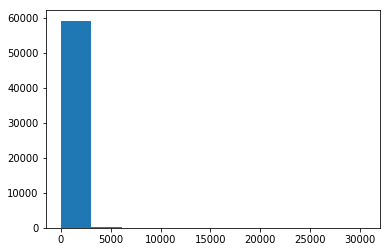

In [55]:
plt.hist(df['population'])
plt.show()

In [63]:
df['scheme_name'].describe()

count     31234
unique     2696
top           K
freq        682
Name: scheme_name, dtype: object

In [89]:
df['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [94]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [95]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [96]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [97]:
df['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [98]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
300      1476
100      1146
50       1139
500      1009
350       986
120       916
400       775
60        706
30        626
40        552
80        533
450       499
20        462
600       438
230       388
75        289
1000      278
800       269
90        265
130       264
25        255
320       249
35        245
360       222
140       215
        ...  
8848        1
628         1
4520        1
468         1
693         1
725         1
789         1
821         1
5300        1
3127        1
2345        1
3031        1
886         1
392         1
424         1
2807        1
726         1
694         1
2569        1
4788        1
662         1
4660        1
406         1
1032        1
1160        1
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [103]:
df['gps_height'].describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64